In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.35, rc={'figure.figsize':(11.7,5.27)}) #Change Font Size 

In [ ]:
NUM_OF_NODE = 3
TIME = 100

"""
Save txt files into lists :
        node1.log -> F1
        node2.log -> F2
        ...
        node8.log -> F8
"""
lines = [[] for _ in range(NUM_OF_NODE)]
times = [[] for i in range(NUM_OF_NODE)]
delays = [[] for i in range(NUM_OF_NODE)]
for i in range(NUM_OF_NODE):
    file = open("scenario1/node" + str(i + 1) + ".log","r")
    for line in file:
        lines[i].append(line)
        sen = line.split()
        # 1675903704 1675903704333736000 1675903704.333381 
        # time.Now().Unix() time.Now().UnixNano() string(buffer[:18])
        times[i].append(int(sen[0]))
        serverTime = float(sen[1]) / 10**6
        clientTime = float(sen[2]) * 10**3
        delays[i].append(serverTime - clientTime) # in millisecond
    file.close()
print(times[0])
print(delays[0])

In [38]:
bandwidths = []
startTime = 0
bdFile = open("scenario1/bandwidth.log","r")
for i, line in enumerate(bdFile):
    line = line.split()
    if i == 0:
        startTime = int(line[0])
    bandwidths.append(line[1])
print(startTime)

1675908663


In [34]:
bdDf = pd.DataFrame(bandwidths, columns=['Bandwidth'])
# select only top 100
bdG = bdDf[:TIME]
bdG

Bandwidth
0          0
1          0
2          0
3          0
4          0
..       ...
95       538
96       450
97       538
98       359
99       270

[100 rows x 1 columns]

In [39]:
# fill in the missing values since start time with 0
for i in range(NUM_OF_NODE):
  for j in range(int(times[i][0]) - 1, startTime - 1, -1):
    times[i].insert(0, j)
    delays[i].insert(0, 0)
dfTimes = pd.DataFrame(times)
dfTimes.fillna(0, inplace=True)
npTimes = np.array(dfTimes).astype(int)
print(npTimes[2])
print(npTimes.shape)
print(startTime)
dfDelay = pd.DataFrame(delays)
dfDelay.fillna(0, inplace=True)
npDelay = np.array(dfDelay).astype(float)
print(npDelay)
# 

[1675908663 1675908664 1675908665 1675908666 1675908667 1675908668
 1675908669 1675908670 1675908671 1675908672 1675908673 1675908674
 1675908675 1675908676 1675908677 1675908678 1675908679 1675908680
 1675908681 1675908682 1675908683 1675908684 1675908685 1675908686
 1675908686 1675908687 1675908687 1675908687 1675908687 1675908688
 1675908688 1675908689 1675908690 1675908690 1675908690 1675908691
 1675908691 1675908692 1675908693 1675908694 1675908694 1675908694
 1675908694 1675908695 1675908696 1675908696 1675908696 1675908697
 1675908697 1675908697 1675908698 1675908699 1675908699 1675908700
 1675908701 1675908701 1675908701 1675908702 1675908702 1675908702
 1675908703 1675908704 1675908705 1675908706 1675908706 1675908707
 1675908708 1675908708 1675908711 1675908711 1675908712 1675908712
 1675908713 1675908714 1675908714 1675908714 1675908715 1675908716
 1675908717 1675908718 1675908719 1675908719 1675908719 1675908719
 1675908719 1675908719 1675908720 1675908721 1675908721 167590

In [42]:
# in range 100 of start time, find all the delays with the idx in times
delaysG = [[] for i in range(TIME)]
for i in range(NUM_OF_NODE):
  for j in range(len(npTimes[i])):
    if npTimes[i,j] >= startTime and (npTimes[i,j] - startTime) < TIME:
      delaysG[npTimes[i,j] - startTime].append(npDelay[i,j])

In [ ]:
delaysG

In [44]:
npBdG = np.array(bdG).reshape(-1,).astype(int)
npBdG.shape

(100,)

In [ ]:
# convert list in delaysG to numpy array
for i in range(len(delaysG)):
  delaysG[i] = np.array(delaysG[i]).astype(float)
# delaysG

In [46]:
# for every second, get median, max, min, .9 quantile of the delays
median = []
maximum = []
minimum = []
quantile = []
for i in range(TIME):
  if len(delaysG[i]) == 0:
    median.append(0)
    maximum.append(0)
    minimum.append(0)
    quantile.append(0)
    continue
  median.append(np.median(delaysG[i]))
  maximum.append(np.max(delaysG[i]))
  minimum.append(np.min(delaysG[i]))
  quantile.append(np.quantile(delaysG[i], 0.9))

/var/folders/1j/0sxffsrn6p52s73v_w3tz7_40000gn/T/ipykernel_32972/864755249.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None, which='major', axis='x')


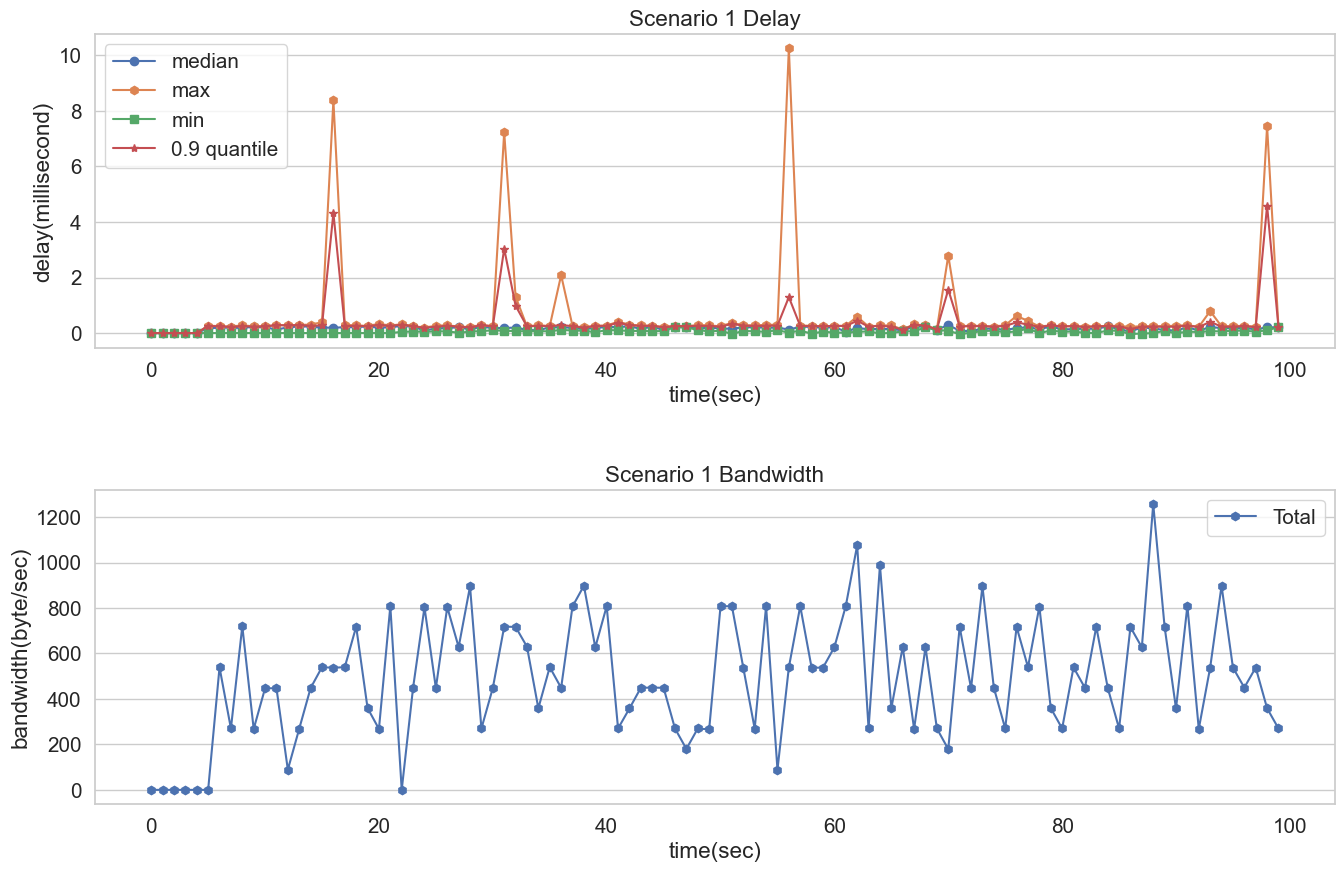

In [47]:
# plot bandwidths each second
timeRange = np.arange(0, TIME)
plt.subplots(figsize=(16, 10)) 
plt.subplots_adjust(hspace=.45)

ax1 = plt.subplot(211)
plt.plot(timeRange, median, marker='o', label='median')
plt.plot(timeRange, maximum, marker='h', label='max')
plt.plot(timeRange, minimum, marker='s', label='min')
plt.plot(timeRange, quantile, marker='*', label='0.9 quantile')
ax1.legend(['median', 'max', 'min', '0.9 quantile'])
ax1.set(xlabel='time(sec)', ylabel='delay(millisecond)', title='Scenario 1 Delay', label="max")
plt.grid(b=None, which='major', axis='x')

ax2 = plt.subplot(212)
plt.plot(timeRange, npBdG, marker='h')
ax2.legend(['Total'])
ax2.set(xlabel='time(sec)', ylabel='bandwidth(byte/sec)', title='Scenario 1 Bandwidth')
plt.grid(None, which='major', axis='x')